In [144]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [145]:
df = pd.read_csv('/content/MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,83.599998,84.809998,83.220001,84.260002,78.978004,29532100
1,2017-12-04,84.419998,84.430000,80.699997,81.080002,75.997337,39094900
2,2017-12-05,81.339996,82.680000,80.980003,81.589996,76.475357,26152300
3,2017-12-06,81.550003,83.139999,81.430000,82.779999,77.590767,26162100
4,2017-12-07,82.540001,82.800003,82.000000,82.489998,77.318954,23184500
...,...,...,...,...,...,...,...
1386,2023-06-07,331.649994,334.489990,322.500000,323.380005,323.380005,40717100
1387,2023-06-08,323.940002,326.640015,323.350006,325.260010,325.260010,23277700
1388,2023-06-09,324.989990,329.989990,324.410004,326.790009,326.790009,22514900
1389,2023-06-12,328.579987,332.100006,325.160004,331.850006,331.850006,24260300


In [146]:
# Extract the input features (X) and the target variable (y)
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = df['Close'].values

In [148]:
train_s = int(X.shape[0]*0.7)
test_s = int(X.shape[0]*0.2)
val_s = int(X.shape[0]*0.1)

In [149]:
X_train = X[0:train_s, :]
X_test = X[train_s:train_s+test_s,:]
X_val = X[train_s+test_s:train_s+test_s+val_s,:]

In [150]:
y_train = y[ 0:train_s]
y_test = y[train_s:train_s+test_s]
y_val = y[train_s+test_s:train_s+test_s+val_s]

In [151]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [152]:
error = [mean_squared_error(y_test,y_pred) for y_pred in model.staged_predict(X_test)]
best_samples_estimators = np.argmin(error)

In [153]:
model = GradientBoostingRegressor(max_depth=4, n_estimators=best_samples_estimators, learning_rate=0.1, random_state=42)

# preTrain the model on the training set
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=99, random_state=42)

In [154]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [155]:
# Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_val_pred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
valid_mae = np.mean(np.abs(y_val_pred - y_val))
test_mae = np.mean(np.abs(y_test_pred - y_test))
valid_mape = np.mean(np.abs((y_val_pred - y_val) / y_val))
test_mape = np.mean(np.abs((y_test_pred - y_test) / y_test))

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 8.639394739407958
Testing RMSE: 12.505407481820459
Validation MAE: 5.716381020199421
Testing MAE: 7.066117182300203
Validation MAPE: 0.019782481111784555
Testing MAPE: 0.022595411161917392


In [156]:
print("R2 score",model.score(X_train, y_train))

R2 score 0.9999925909964362


In [157]:
next_day_features = (df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].iloc[-1]).values.reshape(1, -1)

In [158]:
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(next_day_features)
    predictions.append(next_day_prediction)
    next_day_features[0, :-1] = next_day_features[0, 1:]
    next_day_features[0, -1] = next_day_prediction

print("The next 30 days:\n", predictions)

The next 30 days:
 [array([305.08330119]), array([305.09196437]), array([305.09196437]), array([305.09196437]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164]), array([305.10151164])]


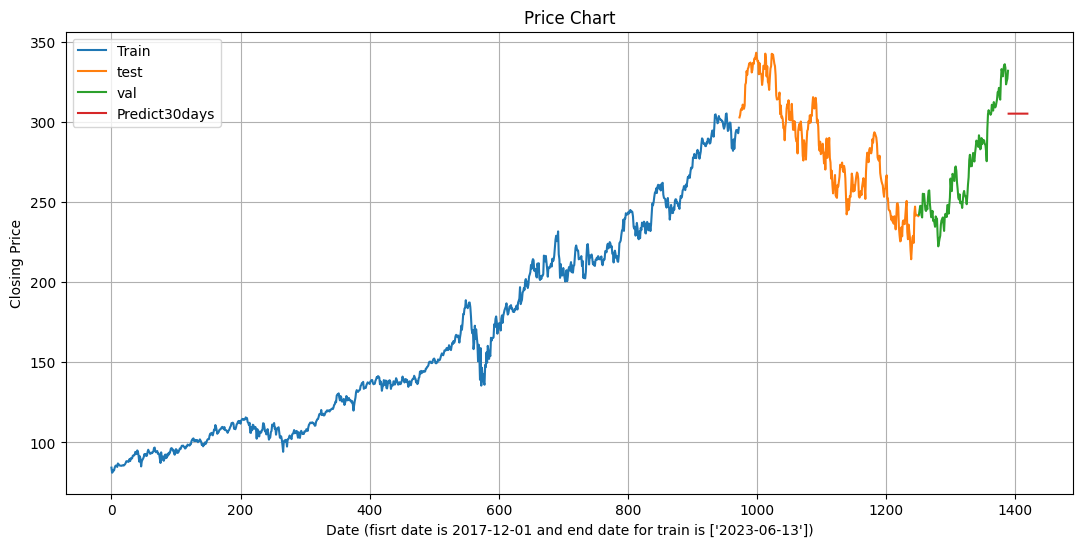

In [159]:
# Plot the price chart
plt.figure(figsize=(13, 6))
train = pd.RangeIndex(start=0, stop=train_s, step=1)
plt.plot(train,y_train)
test = pd.RangeIndex(start=train_s, stop=train_s+test_s, step=1)
plt.plot(test,y_test)
val = pd.RangeIndex(start=train_s+test_s, stop=train_s+test_s+val_s, step=1)
plt.plot(val,y_val)
test_data_index = pd.RangeIndex(start=train_s+test_s+val_s, stop=train_s+test_s+val_s+30, step=1)
plt.plot(test_data_index,predictions)
plt.xlabel('Date (fisrt date is {0} and end date for train is {1})'.format(df['Date'][0],df['Date'][-1:,].values))
plt.ylabel('Closing Price')
plt.title('Price Chart')
plt.grid(True)
plt.legend(['Train','test','val','Predict30days'])
plt.show()